# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import plot_model

## Prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dropout_2 (Dropout)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
__________________________________________________

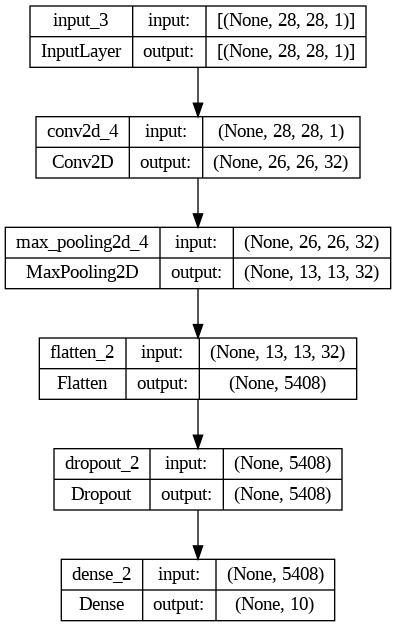

In [ ]:
plot_model(model, "model.png", show_shapes=True)

## Train the model

In [ ]:
batch_size = 128
epochs = 5 # Also try 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 3s 5ms/step - loss: 0.4238 - accuracy: 0.8826 - val_loss: 0.1463 - val_accuracy: 0.9625
Epoch 2/5
422/422 [==============================] - 2s 4ms/step - loss: 0.1709 - accuracy: 0.9498 - val_loss: 0.0984 - val_accuracy: 0.9758
Epoch 3/5
422/422 [==============================] - 2s 4ms/step - loss: 0.1293 - accuracy: 0.9620 - val_loss: 0.0812 - val_accuracy: 0.9787
Epoch 4/5
422/422 [==============================] - 2s 4ms/step - loss: 0.1087 - accuracy: 0.9679 - val_loss: 0.0712 - val_accuracy: 0.9808
Epoch 5/5
422/422 [==============================] - 2s 4ms/step - loss: 0.0967 - accuracy: 0.9707 - val_loss: 0.0677 - val_accuracy: 0.9815


## Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0678885281085968
Test accuracy: 0.9787999987602234


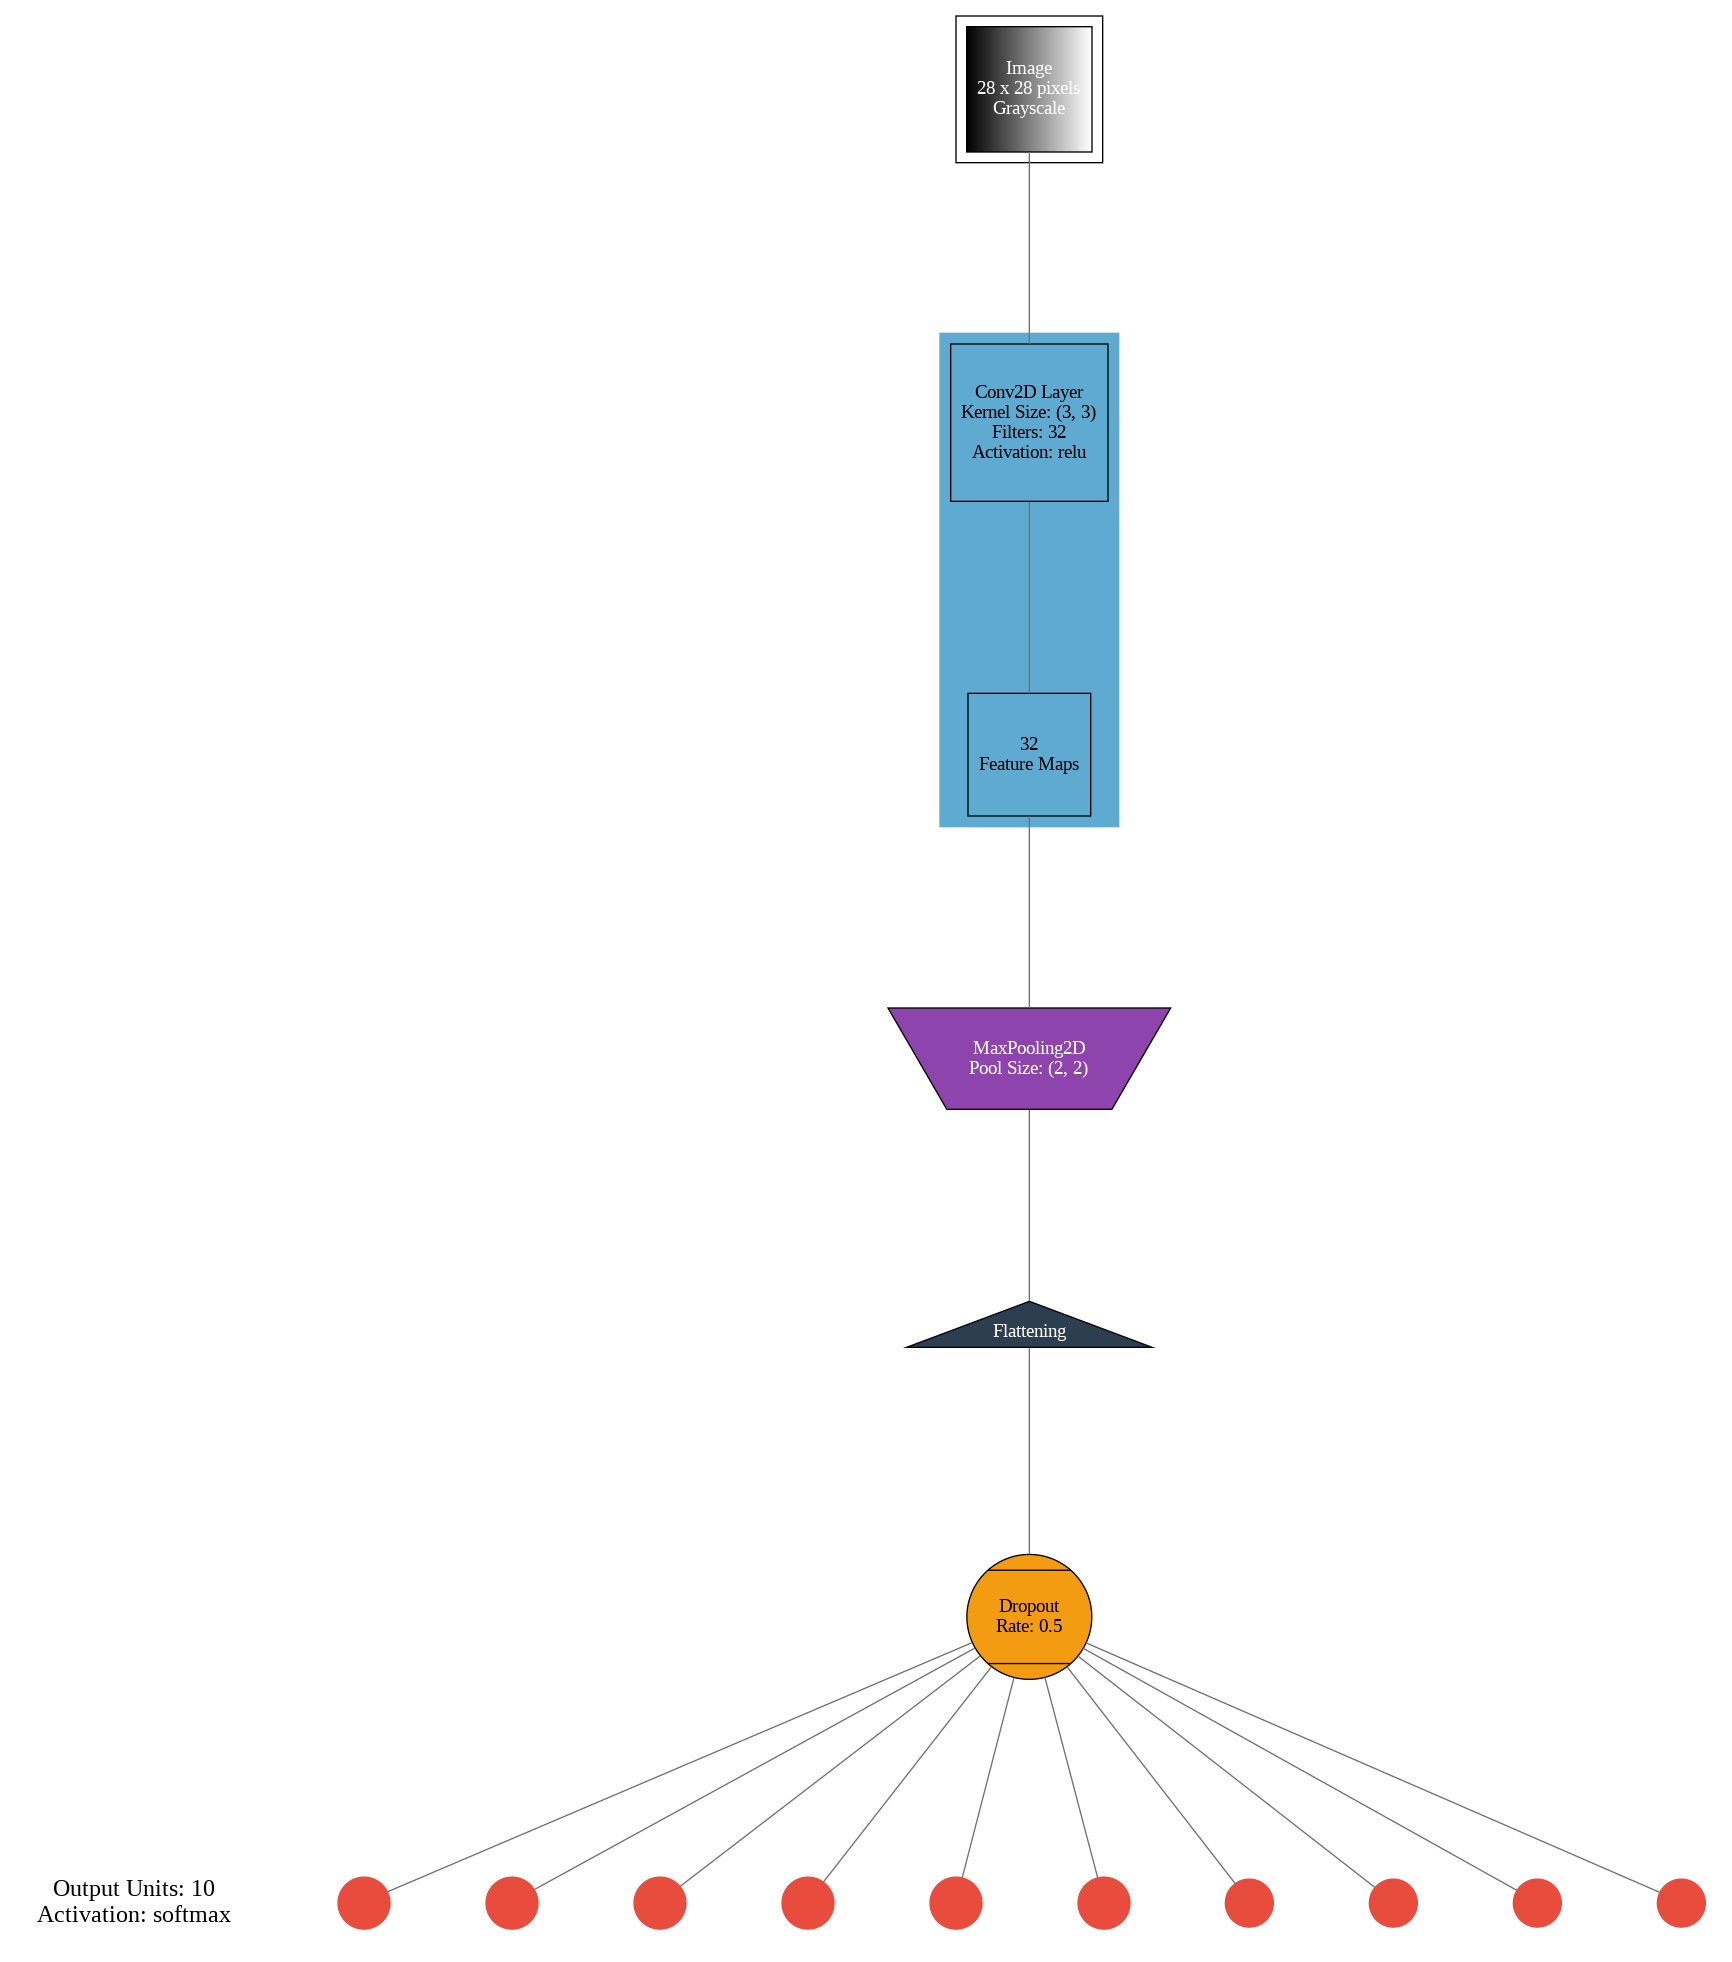

In [ ]:
from keras_visualizer import visualizer
from IPython.display import Image

visualizer(model, 
	file_name="model", 
	file_format='png')
Image("model.png")# Visualizing the network

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)             

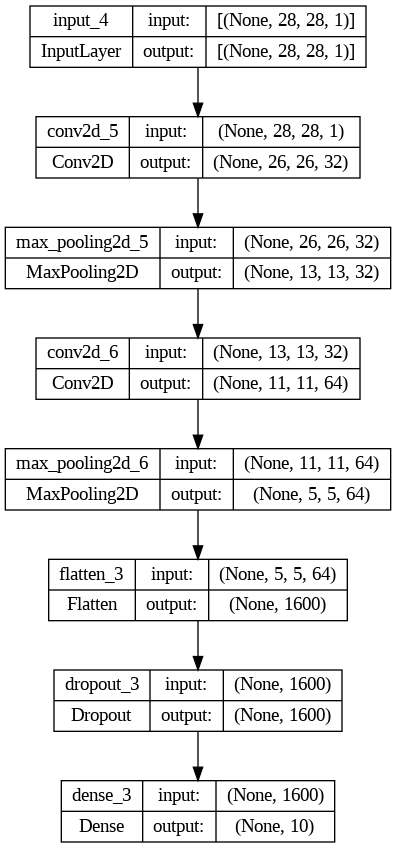

In [ ]:
plot_model(model, "model.png", show_shapes=True)

In [ ]:
batch_size = 128
epochs = 5 # Also try 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 3s 5ms/step - loss: 0.3615 - accuracy: 0.8883 - val_loss: 0.0872 - val_accuracy: 0.9757
Epoch 2/5
422/422 [==============================] - 3s 6ms/step - loss: 0.1176 - accuracy: 0.9637 - val_loss: 0.0578 - val_accuracy: 0.9833
Epoch 3/5
422/422 [==============================] - 3s 7ms/step - loss: 0.0884 - accuracy: 0.9724 - val_loss: 0.0467 - val_accuracy: 0.9877
Epoch 4/5
422/422 [==============================] - 2s 6ms/step - loss: 0.0725 - accuracy: 0.9777 - val_loss: 0.0450 - val_accuracy: 0.9868
Epoch 5/5
422/422 [==============================] - 2s 5ms/step - loss: 0.0625 - accuracy: 0.9808 - val_loss: 0.0364 - val_accuracy: 0.9900


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03645823150873184
Test accuracy: 0.988099992275238


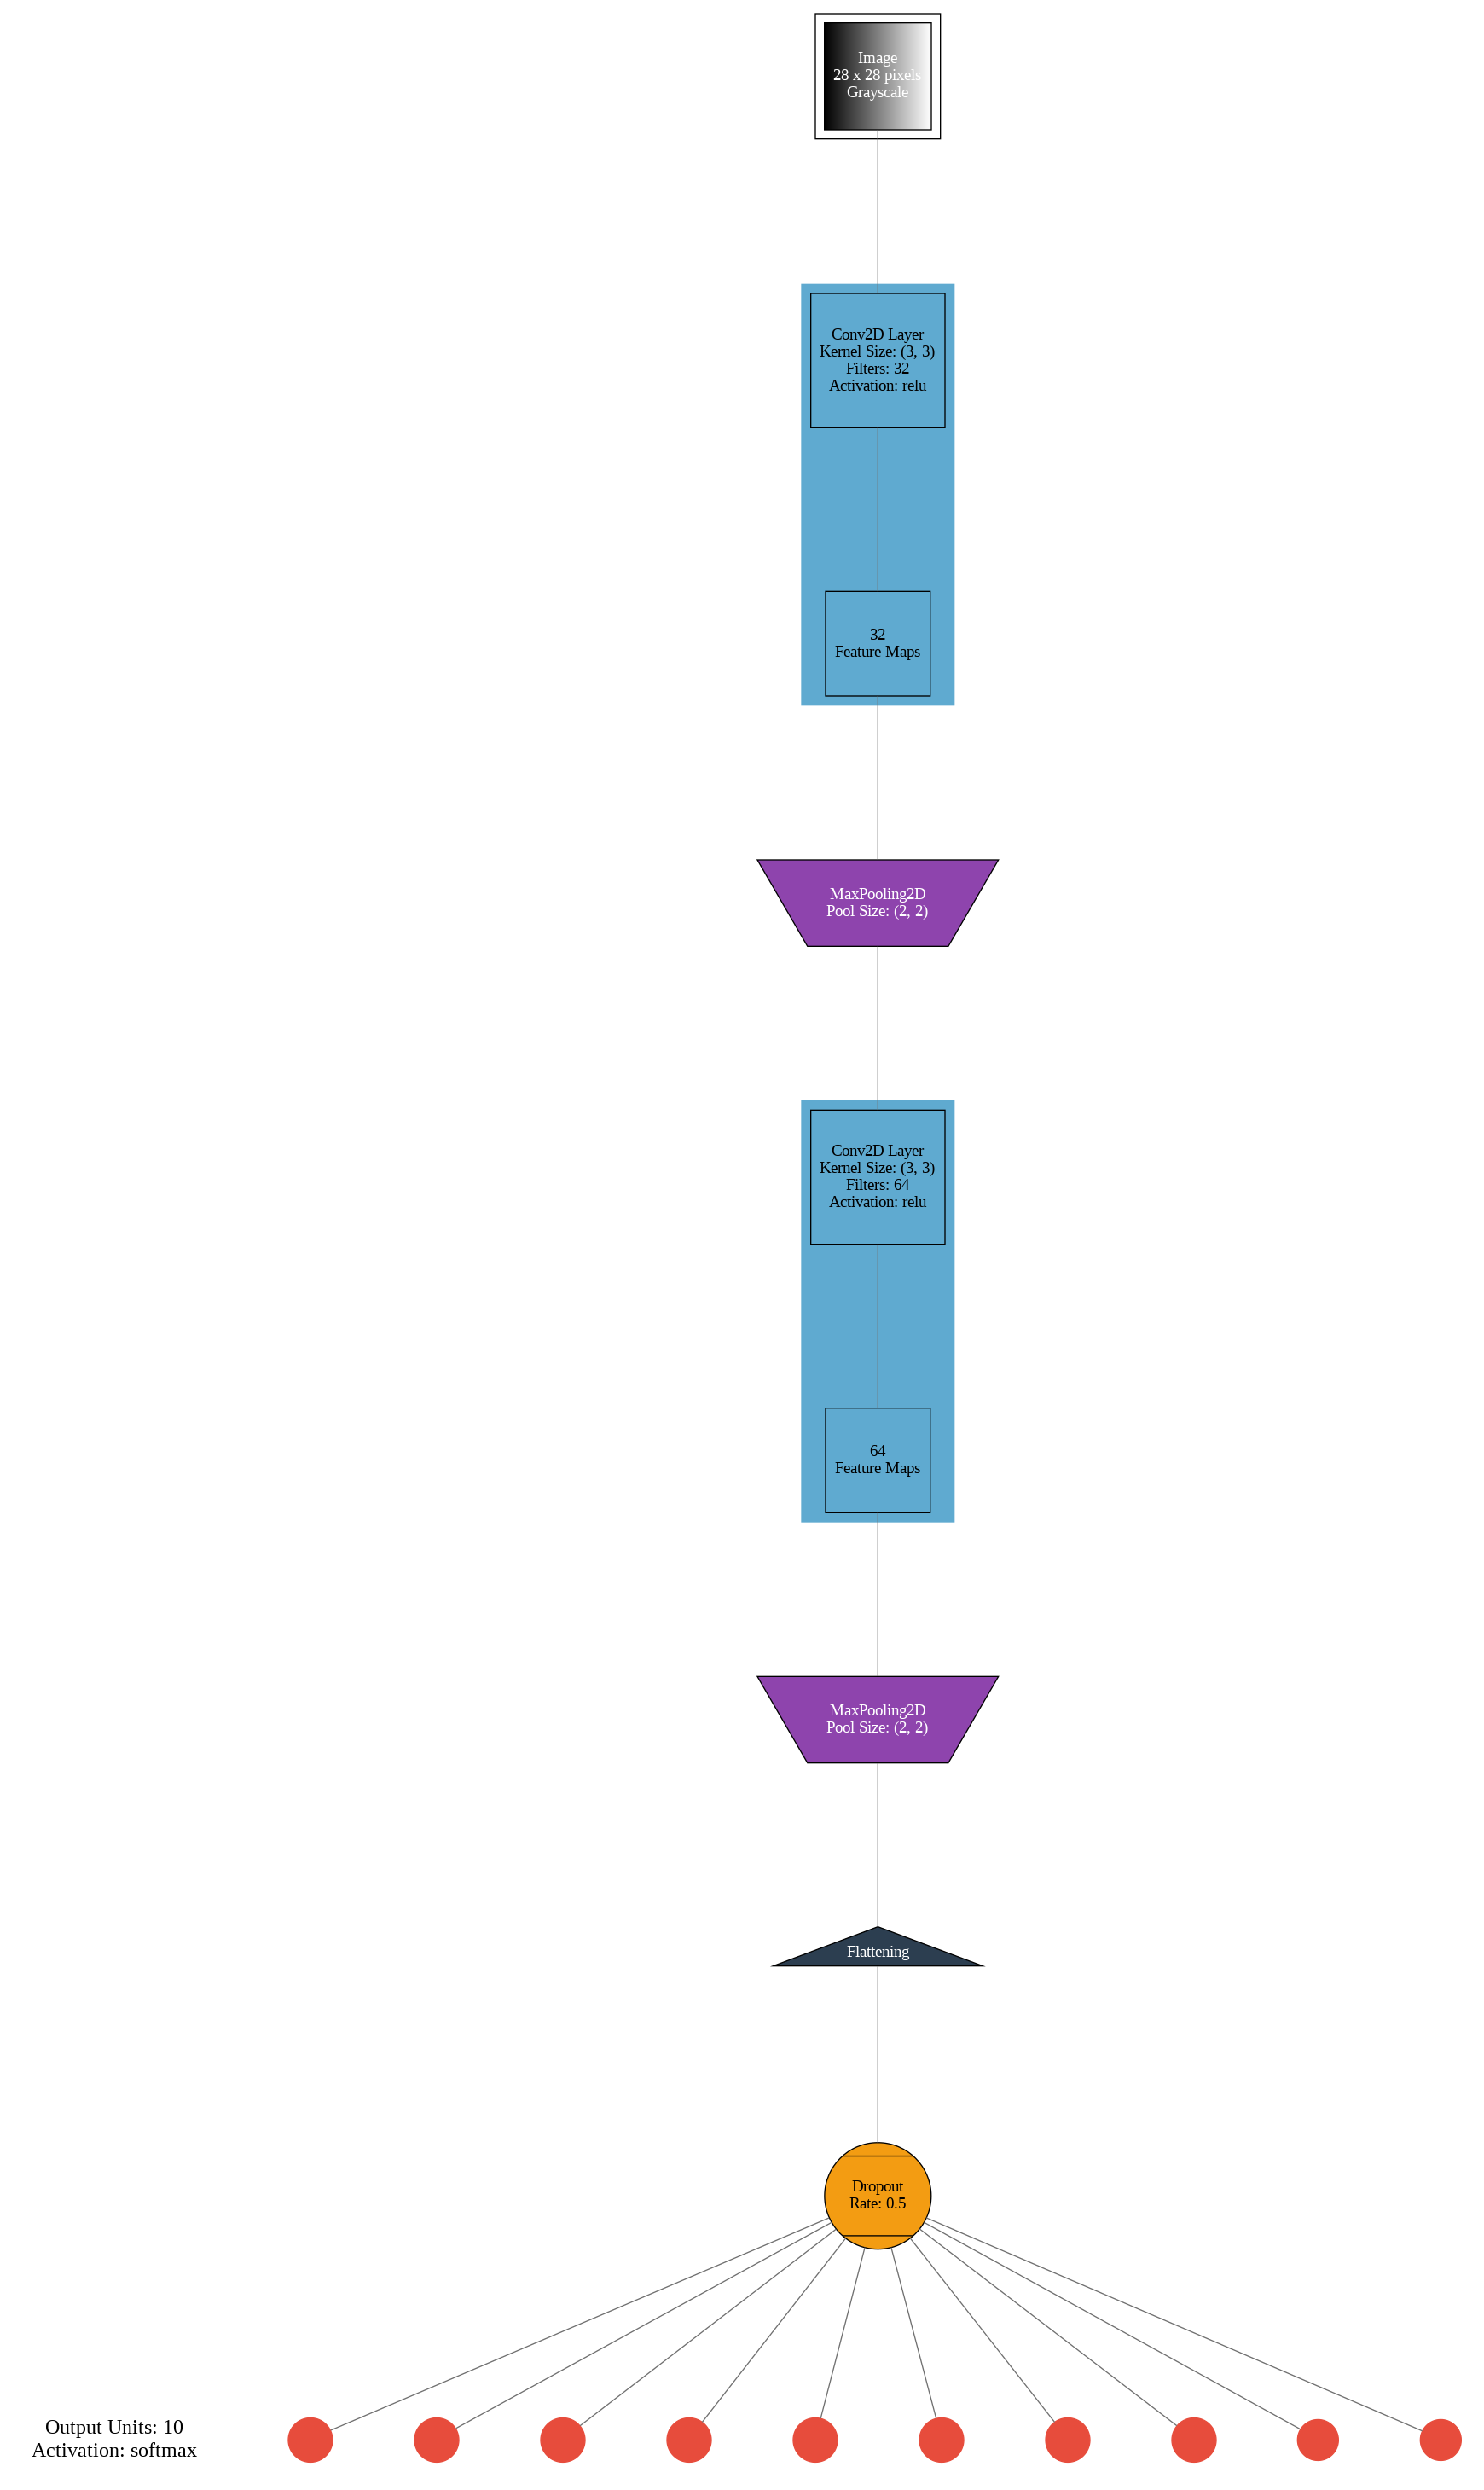

In [ ]:
visualizer(model, 
	file_name="model", 
	file_format='png')
Image("model.png")# Visualizing the network